## Тестирование алгоритма рекомендательных систем

In [2]:
import sys
import os
current_dir = os.path.abspath('')
project_root = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.insert(0, project_root)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from utils.preparation import prepare_recommendation_data
import numpy as np
from recommendations.lfm import LFM
import time

## Подготовка данных

In [10]:
ratings = pd.read_csv("../data/ratings.csv")[['userId','movieId','rating']]
ratings['userId']-=1
ratings['movieId']-=1

In [12]:
R_train, R_test, n_users, n_movies=prepare_recommendation_data(ratings)

## Тестирование алгоритма

In [43]:
lmf=LFM(n_users, n_movies, 20)
start = time.time()
losses=lmf.fit(R_train,n_iters=50)
end = time.time()
print("Время обучения и предсказания собственной реализации:",
      round((end-start) * 10**3,3), "ms")

Время обучения и предсказания собственной реализации: 33164.41 ms


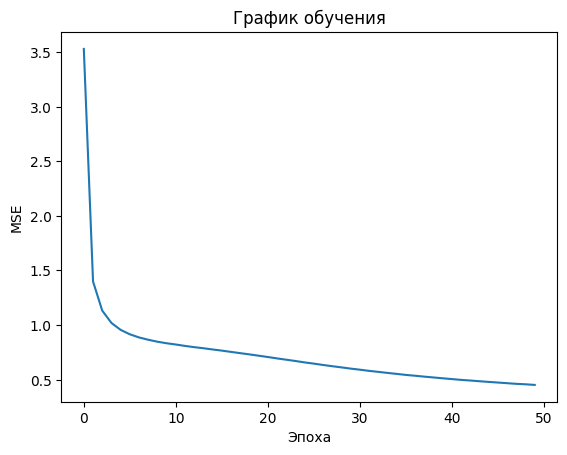

In [44]:
plt.plot([i for i in range(50)], losses)
plt.title('График обучения')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.show()


In [39]:
y_pred=lmf.predict(R_test)
y_real=R_test[:,2]

In [41]:
print(f"RMSE: {round(np.sqrt(mean_squared_error(y_real, y_pred)),4)}")
print(f"MAE: {round(mean_absolute_error(y_real, y_pred),4)}")

RMSE: 0.9822
MAE: 0.7799
